In [1]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.Collecting hmmlearn
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/124.5 kB ? eta 

In [2]:
# Importing Libraries
import numpy as np
import librosa
from hmmlearn import hmm

In [3]:
def extract_features(audio_file, n_mfcc=13, hop_length=512):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract STFT features
    stft = np.abs(librosa.stft(y, hop_length=hop_length))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)

    # Concatenate STFT and MFCC features
    features = np.vstack((stft, mfccs))

    return features.T

In [4]:
def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

In [5]:
def classify_speech(audio_file, model):
    features = extract_features(audio_file)
    log_likelihood = model.score(features)
    return log_likelihood

In [7]:
# Example of training
train_1 = "speech1.wav" # Path to training audio file
train_2 = "colors.wav"
print("Training HMM model1...")
train_features1 = extract_features(train_1)
train_features2 = extract_features(train_2)
hmm_model = train_hmm(train_features1)
hmm_model = train_hmm(train_features2)
print("HMM model trained successfully.")


Training HMM model1...


C:\Users\duvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


HMM model trained successfully.


In [9]:
# Example of classification
test_file = "statement.wav"  # Path to /test audio file
print("Classifying test file...")
likelihood = classify_speech(test_file, hmm_model)
print("Log Likelihood for test data:", likelihood)

Classifying test file...
Log Likelihood for test data: 180531.59161734366


In [12]:
print("Predicting labels for new data...")
new_likelihood = classify_speech(test_file, hmm_model)
predicted_label =hmm_model.predict(extract_features(test_file))
print("Predicted labels for new data:", predicted_label)

Predicting labels for new data...
Predicted labels for new data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 2 2 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


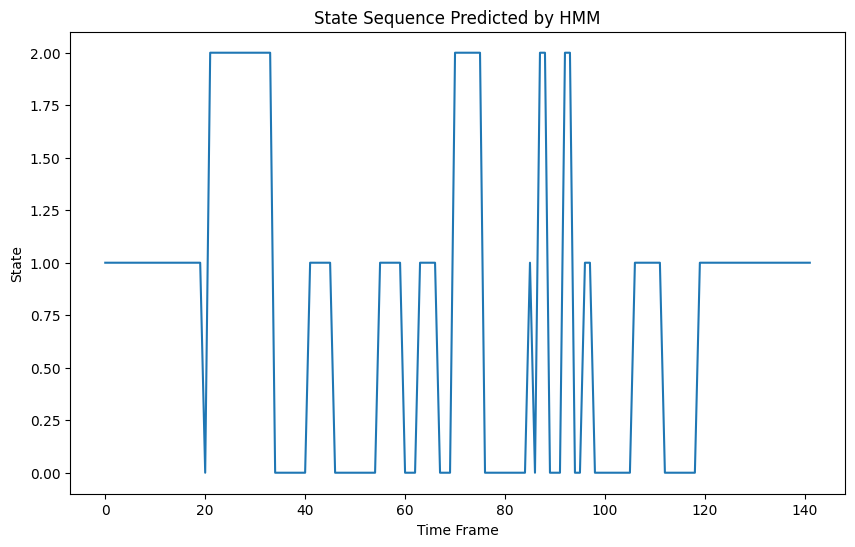

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_label)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()